# Determining Ideal Locations for New Restaurants in Detroit Metropolitan Area
## Author: Neil Gurram

## Introduction

The city of Detroit, Michigan is seemingly trying to get back on the upswing and improve as a city. With this realization, restaurant companies, especially those which wouldn't be considered common such as cuisines from foreign countries, could very well be looking to find a place in Detroit Metropolitan Area (DMA) to take advantage of the high population and bolster their revenues. An increase in the number of restaurants in the DMA could not only allow for variety of restaurants that Detroiters can go to but also could help with increasing employment to provide more jobs in the DMA for those who may be unemployed. With this growth in the restaurant industry, this could supplement the growth of other industries in the DMA, such as tourism, as those go hand in hand.

## Business Problem

The goal of this project is to find locations in DMA that would be suitable to start a restaurant in to help not only bolster the restaurant industry and improve Detroit, but also to provide restaurants the chances to improve their revenue. 

The target audience for this project will be not only people who are interested in opening up restaurants in DMA but also those who would be interested in opening up other types of businesses because similar analyses could be used for other businesses.

## Data

The relevant pieces of data needed for our project are 1) list of cities and towns in DMA, 2) longitudinal and latitudinal data for cities and towns in DMA, and 3) data for venues associated with DMA.

### Cities and Towns in DMA

For the purpose of this project, I will limit the DMA to cities in Macomb, Oakland, and Wayne Counties. I had to web scrape data from websites pertaining to cities in [Macomb](https://geographic.org/streetview/usa/mi/macomb/index.html), [Oakland](https://geographic.org/streetview/usa/mi/oakland/index.html), and [Wayne](https://geographic.org/streetview/usa/mi/wayne/index.html) Counties. The information on the three websites were consistent in that all were under an unordered list (ul) tag, so I could create code that would extract the cities from each of the three counties.

### Longitudes and Latitudes for Cities and Towns in DMA

I will be using the geopy module to get the longitudes and latitudes for cities and towns in DMA. I will then display the results into a Dataframe containing city, county, latitude, and longitude.

Upon initial inspection of the data frame, there seemed to be some errors with the latitudes and longitudes computed, so we needed to focus on the correct latitudes and longitudes. This can be determined by first ensuring that the latitude is at least 41 and at most 43 and longitude is at least -84 and at most -82. Then, from a manual check, we can see that all the latitudes and longitudes seem proper. Alternatively, we could have manually replaced the coordinates that were wrong with the correct ones, but decided to go with the former method simply to ensure all data was coming from the same source.

After filtering, we get a dataframe displayed below.

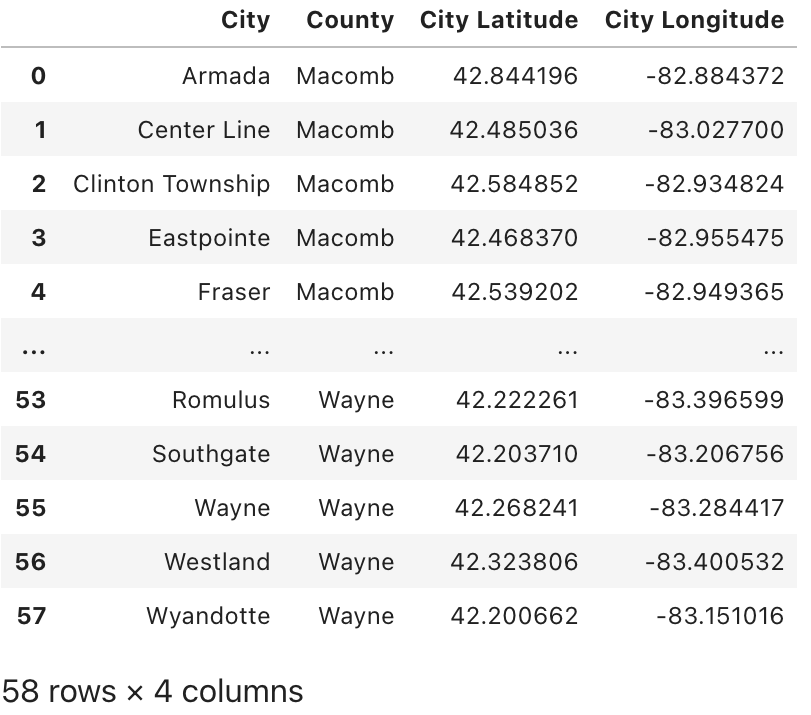

### Venues in DMA

After getting latitude and longitude information for cities in DMA, I will be using the FourSquare API to get relevant venue information for the aforementioned cities. I will append the venue data, which will comprise of the Venue Name, Venue Latitude, Venue Longitude, and Venue Category to the above dataframe associated with city information. To get venues tied to each city, we will find out all venues within one mile of a given latitude,longitude pair. We will limit for each city 200 venues displayed.

After getting the dataframe, I realized there were 292 Venue Categories total, with many not pertinent to restaurants. So I then went through all the unique Venue Categories and only kept the ones that pertained to a restaurant. I made my own discretion as to what to consider to be restaurants. The filtered restaurants data is shown below.

Note that it is possible that the same restaurant could be obtained from two different API calls of neighborhoods of cities. However, when processing later we can ignore duplicates as necessary. It also is possible that there may be restaurants that indeed represent the same restaurant but aren't identical in the dataframe. Because there isn't an obvious way to determine if two restaurants are identical from the data, we will keep the data as is.

We have all the relevant data needed now to proceed forward in our project. Any additional manipulations and presentations of data will be specified in future sections, but will all originate from the three types of data presented here.

## Methodology

### Data Visualization

It is important to visualize the data that is in place. First, one can get a count of the number of cities in each country that is considered, as displayed below.

Then, using Python's Folium package, we can present the cities in the DMA, colored by county.

### Determining Features

After presenting the geographic visualization of the DMA, we then need to go back to our Venue Data and convert it into something more tenable. Namely, the Venue Category is categorical, but we will need to determine an easy way to quantify how similar two cities are by type of venue. This will necessitate using the one-hot encoding where a category column is assigned 1 if it matches the original venue category and 0. The one-hot encoding is shown below.

Furthermore, one would need to be able to classify a score of some sort for each city, representing a proportion of each city that a certain venue category seems to occupy. To do this, one can group by each city and get a cumulative total over all the venue categories and then divide by the total number of venues for each city. This proportion dataframe can be shown below. We remove the coordinates in this dataframe as it is not needed for future analysis.

In addition, as taught in our Capstone Project Course, we can also get a dataframe, as shown below, of top ten venues for each city, or fewer if there weren't ten venues displayed. This will then give an idea of what kind of venues are presented in the city; notice that this translates to determining what are the ten highest venue categories proportions for a given city from the previous dataframe. We shall call this dataframe the top ten dataframe.

Next, one can try to make decisions solely based on the restaurant venues. Perhaps one will decide based on restaurants as the restaurants themselves will provide a better way of scoring a city to determine what kind of city it is. This filtering could provide a different way of determining if two cities are similar.

Going forward in this project, we will use the word unfiltered when discussing the whole data and the filtered when discussing only venues associated with restaurants. For example, the aforementioned dataframes will be considered unfiltered proportion dataframe and the unfiltered top ten dataframe.

With that said, one can then get the filtered proportion dataframe and filtered top ten dataframe. Both these dataframes are shown below.

### Machine Learning Algorithms Used

With the proportion dataframe, one can view each row as an example of a city's data showing the proportion of all the venues. These examples can then be processed with <em>k-means clustering</em>, an unsupervised learning algorithm that can group examples based on a metric, usually Euclidean distance. In this case, examples are closer together based on the similarity between their proportions. This means we only will consider the venue proportions (and not city name, county name, city coordinates, venue name, and venue coordinates) when clustering.

The question then becomes how many clusters would be best suitable to group the data examples. One way to do this is to plot the sum of squares error (or SSE) versus the number of clusters and determine where the graph decreases sharply and then slowly. This describes the <em>elbow method</em>. The plots of the two graph for filtered and unfiltered data is shown below. We only consider two to nine clusters in our plots, given that the number of cities is not too large.

For the unfiltered data (associated with all venues), it is true that there isn't much of an elbow displayed on the graph. But we see there is ever so slightly one at 6, so the optimal number of clusters to choose is 6, and will be used for the unfiltered k-means clustering model. For the filtered data (only associated with restaurants), we observe that it is more erratic at both six and eight clusters, so with our discretion we will set the optimal number of clusters to be 6, and will be used for the filtered k-means clustering model.

## Results

### Considering all Venues

With the unfiltered clustering model, one can then determine the cluster number for each city. This can then be inserted into the the unfiltered top ten dataframe as shown below.

For each cluster, one can present the dataframe for all examples within that cluster. This is shown in the following clusters below in order from Cluster to Cluster.

In addition, from the unfiltered cluster information, one can plot the cities color-coded by the cluster, as shown below.

### Considering only Restaurants

With the filtered clustering model, one can obtain analogously the cluster number for each city and the cluster numbers can be inserted into the filtered top ten dataframe as shown below

For each cluster, one has dataframes associated with all examples for each cluster, and these dataframes are shown in sequence below.

Then, from the filtered cluster information, one can plot the cities color-coded by the cluster, as shown below.

## Discussion

Assume one operates on the assumption that it is good to build a restaurant in an area where other restaurants of similar types are located, as that would eventually attract people to come to the new restaurant, since they would want to try this restaurant's food. Then, based on what type of restaurant a company is looking forward to starting in Detroit, one can determine which cluster is most similar to the restaurant, and then determine which cities may be best to build the restaurant.

The above assumption can be applied similarly to both unfiltered and filtered data. As seen in the unfiltered cluster dataframes in the Results section, one notices that cluster blah blah blah seems to show promise towards restaurants of type <>, as can be gathered from the unfiltered top ten dataframe. In the filtered cluster dataframes in the Results section, one notices that cluster blah blah blah seems to show promise towards restaurants of type <>, as can be gathered from the filtered top ten dataframe.

In addition, one also sees from the unfiltered clustering that cluster blah blah blah doesn't seem that appropriate for building since the venues tied to that cluster is not really related to the restaurant business. As seen from the unfiltered top ten dataframe, the venues seem more along the lines of

## Conclusion

So, this project attempts to find a way to determine where a restaurant can be created in Detroit, under the assumption one is looking for similar restaurants to draw customers from. A k-means clustering algorithm was used to determine this similarity measure, and there were two sets of data that were used for this k-means clustering, namely the filtered dataframes that only consider restaurants and the unfiltered dataframes that consider other venues.

Our project only uses venues within a mile of a specified latitude and longitude of a city to characterize a city; perhaps one needs to consider a larger distance to characterize a city better or should use a smaller distance to avoid noise that may be tied to other cities. Also, the one-hot encoding used for the project seems to include a lot of specific descriptions, so perhaps grouping the specifics into general categories would create a more easy-to-understand model that would give a better characterization of cities within clusters. These two facets could be considered and modified for future research.

In addition, our project assumes that there is enough profit that will be generated to keep the new restaurant above water. It is possible that one may need to consider competition from similar restaurants that may make restaurants not feasible or simply operational costs of working in a city, as certain cities are more expensive than others to work in. These and other factors that businesses place in high importance may be considered in future research, and would inevitably create new models that should be used.